In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

C:\Users\mathi\AppData\Local\Temp\ipykernel_5172\833354621.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Text(0, 0.5, 'y')

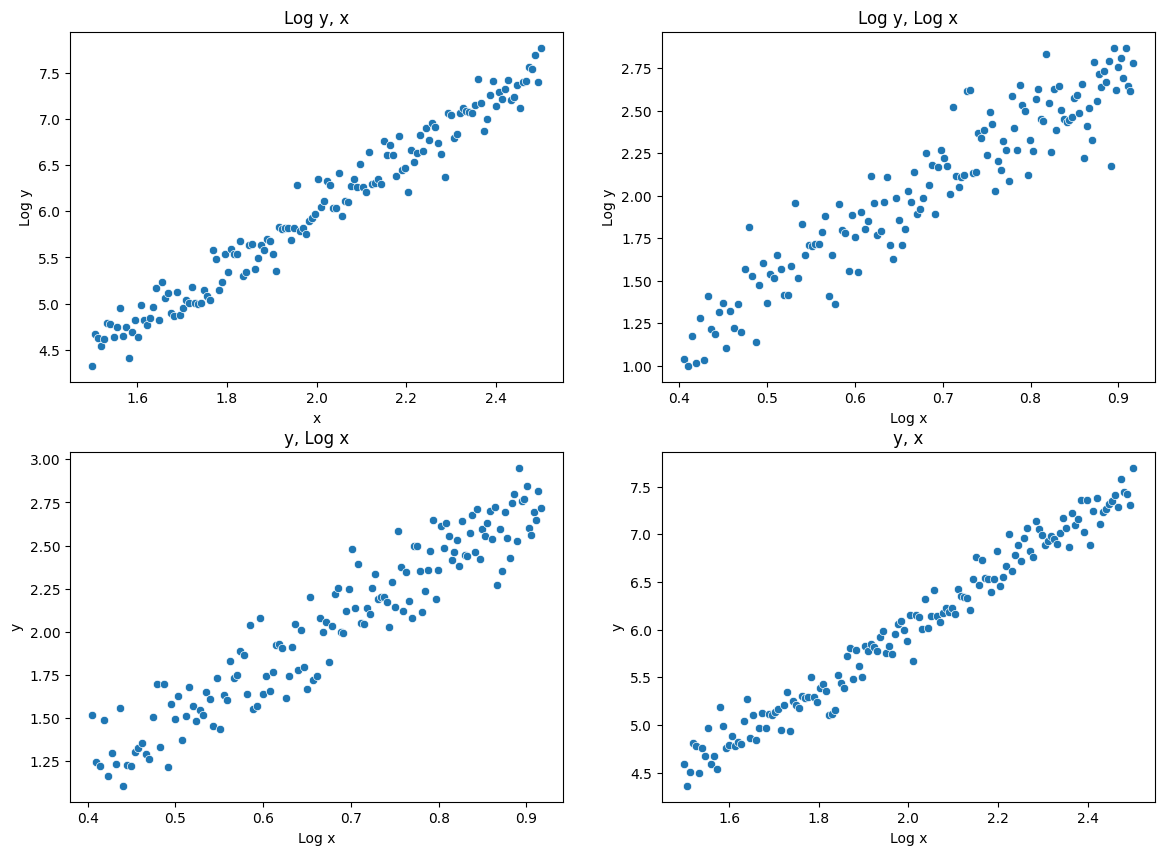

In [17]:
alpha = 0
beta = 3
std = 0.15
n = 150

x = np.linspace(1.5, 2.5, n)
log_x = np.log(x)

y1 = alpha + beta * x + np.random.normal(0, std, n)

log_y2 = alpha + beta * x + np.random.normal(0, std, n)
y2 = np.exp(log_y2)

log_y3 = alpha + beta * log_x + np.random.normal(0, std, n)
y3 = np.exp(log_y3)

y4 = alpha + beta * log_x + np.random.normal(0, std, n)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(x=x, y=log_y2, ax=axs[0, 0])
axs[0, 0].set_title('Log y, x')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Log y')

sns.scatterplot(x=log_x, y=log_y3, ax=axs[0, 1])
axs[0, 1].set_title('Log y, Log x')
axs[0, 1].set_xlabel('Log x')
axs[0, 1].set_ylabel('Log y')

sns.scatterplot(x=log_x, y=y4, ax=axs[1, 0])
axs[1, 0].set_title('y, Log x')
axs[1, 0].set_xlabel('Log x')
axs[1, 0].set_ylabel('y')

sns.scatterplot(x=x, y=y1, ax=axs[1, 1])
axs[1, 1].set_title('y, x')
axs[1, 1].set_xlabel('Log x')
axs[1, 1].set_ylabel('y')

# Fit

In [19]:
model1 = sm.OLS(y1, sm.add_constant(x)).fit()
model2 = sm.OLS(y2, sm.add_constant(x)).fit()
model3 = sm.OLS(y3, sm.add_constant(x)).fit()
model4 = sm.OLS(y4, sm.add_constant(x)).fit()

Text(0, 0.5, 'y')

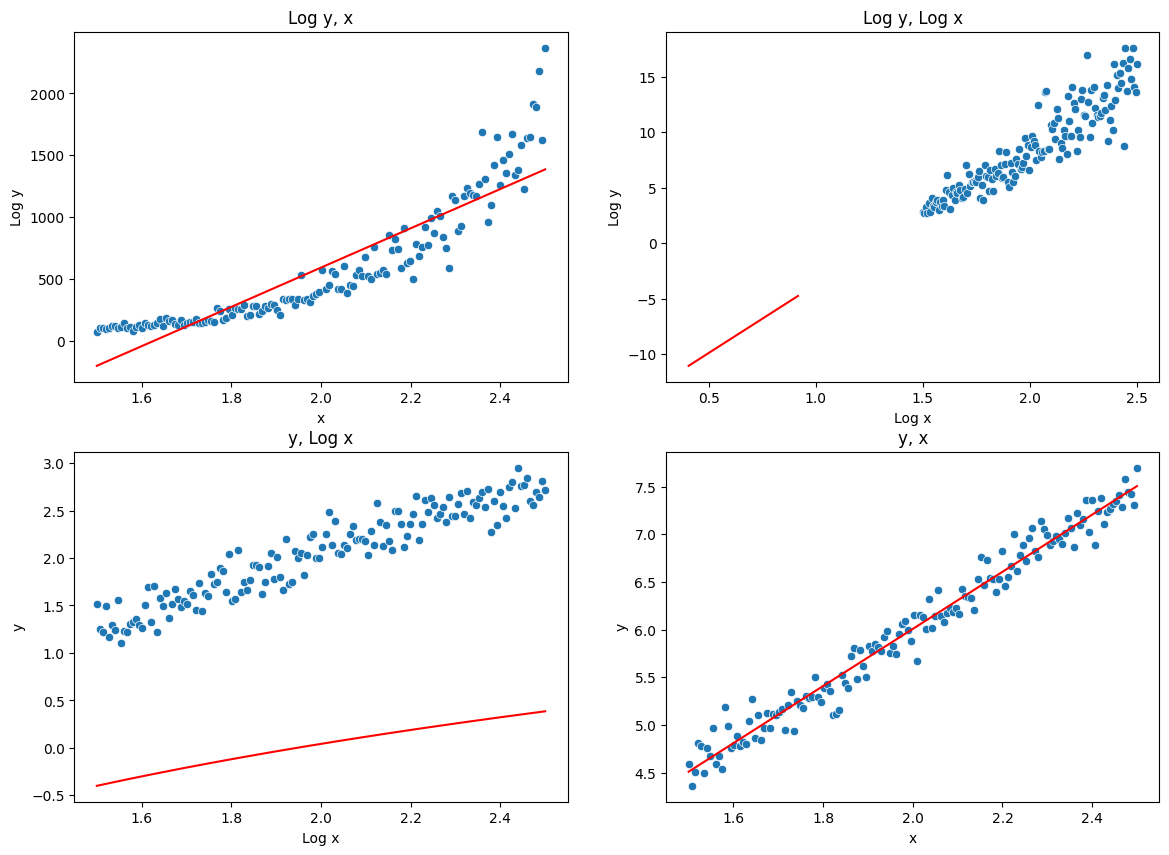

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(x=x, y=y2, ax=axs[0, 0])
axs[0, 0].plot(x, model2.predict(sm.add_constant(x)), color='red', label='Fit')
axs[0, 0].set_title('Log y, x')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Log y')

sns.scatterplot(x=x, y=y3, ax=axs[0, 1])
axs[0, 1].plot(x, model3.predict(sm.add_constant(x)), color='red', label='Fit')
axs[0, 1].set_title('Log y, Log x')
axs[0, 1].set_xlabel('Log x')
axs[0, 1].set_ylabel('Log y')

sns.scatterplot(x=x, y=y4, ax=axs[1, 0])
axs[1, 0].plot(x, model4.predict(sm.add_constant(log_x)), color='red', label='Fit')
axs[1, 0].set_title('y, Log x')
axs[1, 0].set_xlabel('Log x')
axs[1, 0].set_ylabel('y')

sns.scatterplot(x=x, y=y1, ax=axs[1, 1])
axs[1, 1].plot(x, model1.predict(sm.add_constant(x)), color='red', label='Fit')
axs[1, 1].set_title('y, x')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')